In [278]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression ,LogisticRegression
df=pd.read_csv('loan.csv')
test=df



k=test.isnull().sum()/len(df)*100<30
test=test.iloc[:,k.values]
k=test.isnull().sum()/len(df)
test=test.dropna()
k=test.isnull().sum()/len(df)

del(test['id'])
del(test['member_id'])


In [279]:
    
test['revol_util']=test['revol_util'].apply(lambda x:x.rstrip('%'))
test['revol_util'] =pd.to_numeric(test['revol_util'])


In [280]:
for i in test.columns:
   if len(test[i].unique())==1:
    del(test[i])

test=test.drop(["emp_title","issue_d","url","purpose","title","zip_code","addr_state","earliest_cr_line","last_pymnt_d","last_credit_pull_d"],axis=1)
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 32 columns):
loan_amnt                  36431 non-null int64
funded_amnt                36431 non-null int64
funded_amnt_inv            36431 non-null float64
term                       36431 non-null object
int_rate                   36431 non-null object
installment                36431 non-null float64
grade                      36431 non-null object
sub_grade                  36431 non-null object
emp_length                 36431 non-null object
home_ownership             36431 non-null object
annual_inc                 36431 non-null float64
verification_status        36431 non-null object
loan_status                36431 non-null object
dti                        36431 non-null float64
delinq_2yrs                36431 non-null int64
inq_last_6mths             36431 non-null int64
open_acc                   36431 non-null int64
pub_rec                    36431 non-null int64
revol_bal  

In [281]:

test['term']=test['term'].apply(lambda x: x.rstrip('months'))
test['term']=pd.to_numeric(test['term'])

In [282]:
test['int_rate']=test['int_rate'].apply(lambda x:x.rstrip('%'))
test['int_rate']=pd.to_numeric(test['int_rate'])

In [283]:
len(test["grade"].unique())
test["grade"]=test["grade"].map({'A':int('1'),'B':int('2'),'C':int('3'),'D':int('4'),'E':int('5'),'F':int('6'),'G':int('7')})
test["grade"].value_counts()
k=float(1.1)
print(k)
                                 

1.1


In [284]:
len(test["sub_grade"].unique())
test["sub_grade"]=test["sub_grade"].map({'A1':float('1.1'),'A2':float('1.2'),'A3':float('1.3'),'A4':float('1.4'),'A5':float('1.5'),
                                         'B1':float('2.1'),'B2':float('2.2'),'B3':float('2.3'),'B4':float('2.4'),'B5':float('2.5'),
                                         'C1':float('3.1'),'C2':float('3.2'),'C3':float('3.3'),'C4':float('3.4'),'C5':float('3.5'),
                                         'D1':float('4.1'),'D2':float('4.2'),'D3':float('4.3'),'D4':float('4.4'),'D5':float('4.5'),
                                         'E1':float('5.1'),'E2':float('5.2'),'E3':float('5.3'),'E4':float('5.4'),'E':float('5.5'),
                                         'F1':float('6.1'),'F2':float('6.2'),'F3':float('6.3'),'F4':float('6.4'),'F5':float('6.5'),
                                         'G1':float('7.1'),'G2':float('7.2'),'G3':float('7.1'),'G4':float('7.4'),'G5':float('7.5')})
test['sub_grade'].value_counts()

2.3    2674
1.4    2673
2.5    2529
1.5    2511
2.4    2319
3.1    1949
3.2    1870
2.2    1870
2.1    1643
1.3    1630
3.3    1406
1.2    1356
4.2    1245
3.4    1123
3.5    1082
4.3    1078
1.1    1005
4.4     905
4.1     845
4.5     801
5.1     729
5.2     606
5.3     516
5.4     423
6.1     315
6.2     230
6.3     170
6.4     151
7.1     142
6.5     103
7.2      75
7.4      56
7.5      25
Name: sub_grade, dtype: int64

In [285]:
test["loan_status"]=test["loan_status"].map({'Fully Paid':int('0'),'Current':int('1'),'Charged Off':int('2')})
test["loan_status"].value_counts()


0    30423
2     4942
1     1066
Name: loan_status, dtype: int64

In [286]:
test.info()
test['emp_length'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 32 columns):
loan_amnt                  36431 non-null int64
funded_amnt                36431 non-null int64
funded_amnt_inv            36431 non-null float64
term                       36431 non-null int64
int_rate                   36431 non-null float64
installment                36431 non-null float64
grade                      36431 non-null int64
sub_grade                  36055 non-null float64
emp_length                 36431 non-null object
home_ownership             36431 non-null object
annual_inc                 36431 non-null float64
verification_status        36431 non-null object
loan_status                36431 non-null int64
dti                        36431 non-null float64
delinq_2yrs                36431 non-null int64
inq_last_6mths             36431 non-null int64
open_acc                   36431 non-null int64
pub_rec                    36431 non-null int64
revol_bal   

10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [287]:
test['emp_length']= test['emp_length'].map({'< 1 year':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'10+ years':int('10')})
test['emp_length']

1         0
3        10
4         1
5         3
6         8
         ..
39433     7
39475     6
39551     2
39562     1
39623     8
Name: emp_length, Length: 36431, dtype: int64

In [288]:
test.info()
test['home_ownership'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 32 columns):
loan_amnt                  36431 non-null int64
funded_amnt                36431 non-null int64
funded_amnt_inv            36431 non-null float64
term                       36431 non-null int64
int_rate                   36431 non-null float64
installment                36431 non-null float64
grade                      36431 non-null int64
sub_grade                  36055 non-null float64
emp_length                 36431 non-null int64
home_ownership             36431 non-null object
annual_inc                 36431 non-null float64
verification_status        36431 non-null object
loan_status                36431 non-null int64
dti                        36431 non-null float64
delinq_2yrs                36431 non-null int64
inq_last_6mths             36431 non-null int64
open_acc                   36431 non-null int64
pub_rec                    36431 non-null int64
revol_bal    

RENT        17464
MORTGAGE    16298
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64

In [289]:
test['home_ownership']=test['home_ownership'].map({'RENT':int(0),'MORTGAGE':int('1'),'OWN':int('2'),'OTHER':int('3')})
test['home_ownership']

1        0
3        0
4        0
5        0
6        0
        ..
39433    0
39475    1
39551    0
39562    0
39623    1
Name: home_ownership, Length: 36431, dtype: int64

In [290]:
test['verification_status'] = test['verification_status'].map({'Not Verified':int('0'),'Verified':int('2'),'Source Verified':int('1')})
test['verification_status'].value_counts()

0    15054
2    11926
1     9451
Name: verification_status, dtype: int64

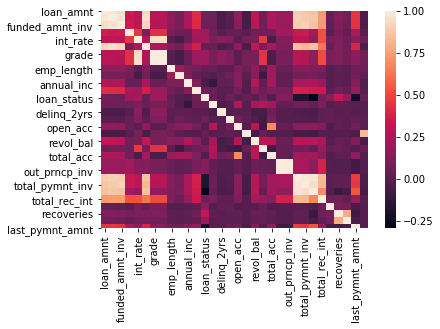

In [291]:
p=test.corr()

sns.heatmap(p)


In [292]:
p


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981388,0.953247,0.364192,0.308209,0.928915,0.290471,0.287706,0.150913,0.107798,...,0.192881,0.888887,0.866102,0.854813,0.730418,0.044322,0.136144,0.075101,0.451001,-0.031561
funded_amnt,0.981388,1.000000,0.972773,0.344113,0.312507,0.954986,0.291987,0.289172,0.150797,0.103794,...,0.195159,0.905752,0.883680,0.873309,0.738708,0.046079,0.136635,0.076809,0.455494,-0.033192
funded_amnt_inv,0.953247,0.972773,1.000000,0.356668,0.304517,0.921844,0.276020,0.272689,0.157207,0.099614,...,0.202984,0.892843,0.913117,0.858757,0.735545,0.032999,0.128201,0.066378,0.445489,-0.038262
term,0.364192,0.344113,0.356668,1.000000,0.453367,0.102203,0.438059,0.436491,0.109482,0.068843,...,0.223451,0.337193,0.346671,0.224357,0.531594,0.016218,0.103595,0.035510,0.236856,0.015658
int_rate,0.308209,0.312507,0.304517,0.453367,1.000000,0.281933,0.950783,0.961440,0.006385,-0.057138,...,0.134722,0.311227,0.304549,0.188680,0.532213,0.097046,0.124835,0.071284,0.160972,0.082400
installment,0.928915,0.954986,0.921844,0.102203,0.281933,1.000000,0.266007,0.263505,0.122675,0.081342,...,0.125747,0.858998,0.832667,0.853784,0.635133,0.054395,0.117511,0.076804,0.402433,-0.029280
grade,0.290471,0.291987,0.276020,0.438059,0.950783,0.266007,1.000000,0.994991,0.006419,-0.050447,...,0.099670,0.293760,0.280469,0.172501,0.516238,0.103792,0.121931,0.074001,0.147204,0.078743
sub_grade,0.287706,0.289172,0.272689,0.436491,0.961440,0.263505,0.994991,1.000000,0.001492,-0.054491,...,0.099281,0.291308,0.277749,0.170510,0.518024,0.105917,0.121736,0.074083,0.145549,0.080406
emp_length,0.150913,0.150797,0.157207,0.109482,0.006385,0.122675,0.006419,0.001492,1.000000,0.212858,...,0.051259,0.135578,0.141899,0.125397,0.123143,-0.012249,0.027259,0.011355,0.073499,0.061803
home_ownership,0.107798,0.103794,0.099614,0.068843,-0.057138,0.081342,-0.050447,-0.054491,0.212858,1.000000,...,0.024292,0.093890,0.090988,0.096316,0.061212,-0.007562,0.013661,0.005851,0.074718,0.019825
